In [2]:
#Download data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

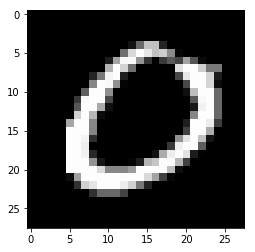

In [14]:
#View data
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs
X = X.reshape([28,28])
plt.gray()
plt.imshow(X)

In [16]:
#Declare variables
x = tf.placeholder(tf.float32, [None, 784]) #Input pixels
W = tf.Variable(tf.zeros([784,10])) #Weights for all 10 possible classification
b = tf.Variable(tf.zeros([10])) #Regularization variable
y = tf.nn.softmax(tf.matmul(x,W) + b) #predicted
y_ = tf.placeholder(tf.float32, [None, 10]) #Lables

tf.summary.histogram('W',W)
tf.summary.histogram('b',b)
tf.summary.histogram('y',y)

<tf.Tensor 'y:0' shape=() dtype=string>

In [26]:
#TRAIN STEP
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), axis=1))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [27]:
sess = tf.InteractiveSession()

In [28]:
#ITERATIONS
#summary_writer = tf.summary.FileWriter(tb_logdir , sess.graph)
tf.global_variables_initializer().run()
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    #summary_writer.add_summary(summary, i)
    #sess.run([accuracy,tf.summary.merge_all()], feed_dict={x: batch_xs, y_: batch_ys})

In [29]:
#PREDICTION
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

#ACCURACY
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
tf.summary.scalar('accuracy',accuracy)
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

<tf.Tensor 'accuracy:0' shape=() dtype=string>